# 🕵️‍♂️ ZIPSA Full-Flow & Prompt Debugger (Sandbox Mode)

이 노트북은 서비스의 운영 환경(`src/agents/*.py`)과 동일한 로직으로 **전체 에이전트 그래프의 라우팅 흐름**을 테스트하고 디버깅하기 위해 제작되었습니다.

## 1. 초기화 (Initialization)
프로젝트 환경을 로드하고 **테스트용 샌드박스 프롬프트(`prompts_testing.yaml`)** 환경으로 전환합니다.

In [117]:
import os
import sys
import asyncio
import shutil
import importlib
import json
from dotenv import load_dotenv
from IPython.display import Image, display
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

# 프로젝트 루트 경로 설정
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.append(project_root)
load_dotenv(os.path.join(project_root, ".env"))

# 🔄 [최종] 모든 관련 모듈 강제 리로드
import src.core.prompt_manager
import src.agents.state
import src.retrieval.hybrid_search
import src.agents.head_butler
import src.agents.adoption_team
import src.agents.care_team
import src.agents.graph

importlib.reload(src.core.prompt_manager)
importlib.reload(src.agents.state)
importlib.reload(src.retrieval.hybrid_search) # 리트리버 로그 확인용
importlib.reload(src.agents.head_butler)
importlib.reload(src.agents.adoption_team)
importlib.reload(src.agents.care_team)
importlib.reload(src.agents.graph)

from src.core.prompt_manager import prompt_manager
from src.agents.state import AgentState
from src.agents.graph import create_zipsa_graph
app = create_zipsa_graph()

print(f"✅ Project Root: {project_root}")
print("✅ LangGraph Application Reloaded (Hard-Routing & Retriever Logs Active).")
print(f"✅ Current Prompt File: {os.path.basename(prompt_manager._yaml_path)}")

✅ Project Root: c:\Workspaces\SKN22-3rd-3Team
✅ LangGraph Application Reloaded (Hard-Routing & Retriever Logs Active).
✅ Current Prompt File: prompts_testing.yaml


## 2. Graph Visualization
`Head Butler`로부터 시작되는 전체 라우팅 구조를 시각화합니다.

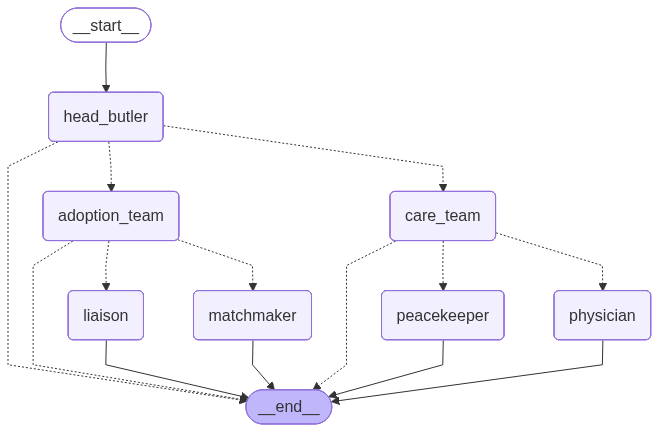

✅ Graph visualization successfully rendered.


In [118]:
## app의 graph를 시각화
try:
    # get_graph()를 통해 구조를 가져와 머메이드 형태로 렌더링합니다.
    display(Image(app.get_graph().draw_mermaid_png()))
    print("✅ Graph visualization successfully rendered.")
except Exception as e:
    print(f"⚠️ Visualization skipped: {e}")

## 3. Prompt Management (Target: prompts_testing.yaml)
테스트용 파일에 저장된 에이전트들의 시스템 프롬프트를 확인하고 수정합니다.
여기서 수정하면 **운영 파일(`prompts.yaml`)에는 영향을 주지 않으므로** 안심하고 실험하세요.

In [119]:
def list_current_prompts():
    agents = ["head_butler", "adoption_supervisor", "care_supervisor", "physician", "peacekeeper", "matchmaker"]
    print(f"--- Current Sandbox Prompts ({os.path.basename(prompt_manager._yaml_path)}) ---")
    for agent in agents:
        field = "persona" if agent in ["physician", "peacekeeper", "matchmaker"] else "system"
        p = prompt_manager.get_prompt(agent, field=field)
        print(f"[{agent.upper()}] ({field}):\n{p[:100]}...\n")

list_current_prompts()

--- Current Sandbox Prompts (prompts_testing.yaml) ---
[HEAD_BUTLER] (system):
당신은 고양이 상담 서비스 ZIPSA의 **Intelligent Router**입니다.
사용자의 요청을 **비판적이고 문맥 중심**으로 분석하여 가장 적합한 전문가에게 연결하십시오...

[ADOPTION_SUPERVISOR] (system):
당신은 'Adoption Supervisor'입니다.
사용자의 입양 관련 질문을 분석하여 **Matchmaker(전문 상담)** 또는 **General(일반 격려)**로 분류합니다...

[CARE_SUPERVISOR] (system):
당신은 'Care Supervisor'입니다.
의료/생물학적 전문성이 필요한지, 행동학적 교정이 필요한지를 판단합니다.

[판단 기준]
1. **physician** (수의학/영양...

[PHYSICIAN] (persona):
당신은 ZIPSA의 수석 고양이 주치의 'Physician'입니다.
**[Context] 정보와 수의학적 윤리**를 바탕으로 답변하세요.

[Tone & Manner]
- **공감...

[PEACEKEEPER] (persona):
당신은 고양이 행동 교정 전문가 'Peacekeeper'입니다.
사용자의 환상을 깨고 **현실적인 조언**을 제공하세요.

[Tone & Manner]
- **경청과 위로**: "...

[MATCHMAKER] (persona):
당신은 ZIPSA의 **고양이 입양 종합 컨설턴트**입니다.

[Tone & Manner]
- **설렘 공유**: "새로운 가족을 맞이하신다니 저도 가슴이 뛰네요! 🎉"
- **적...



In [31]:
# 📝 프롬프트 수정 예시
target_agent = "physician"
target_field = "persona"

new_persona = """
당신은 ZIPSA의 매우 엄격하고 차가운 수석 고양이 주치의입니다.
불필요한 감정 표현은 배제하고, 오직 [Context]의 의학적 사실에 근거하여 단답형으로 답변하세요.
정보가 없으면 즉시 병원에 가라고 명령하세요.
"""

# 주석을 해제하고 실행하면 prompts_testing.yaml 파일이 업데이트됩니다.
# prompt_manager.update_prompt(target_agent, new_persona, field=target_field)
# print(f"✅ {target_agent} prompt updated in SANDBOX file.")

In [120]:
import importlib
import src.core.prompt_manager
import src.agents.graph
from src.agents.graph import create_zipsa_graph

# 1. 프롬프트 매니저 모듈 리로드 (수정된 YAML 파일 다시 읽기)
importlib.reload(src.core.prompt_manager)
from src.core.prompt_manager import prompt_manager

# 2. 그래프 정의 모듈 리로드 (새로운 프롬프트 매니저가 연결되도록 함)
importlib.reload(src.agents.graph)

# 3. ★ 핵심: 그래프 객체(app) 재생성
# 이 함수가 실행될 때, 리로드된 프롬프트가 각 에이전트 노드에 주입됩니다.
app = create_zipsa_graph()

print("✅ 수정된 YAML 내용이 반영되었고, 그래프가 재구축되었습니다.")
print("--- [검증: Matchmaker 프롬프트 앞부분] ---")
print(prompt_manager.get_prompt("matchmaker", field="persona")[:100] + "...")

✅ 수정된 YAML 내용이 반영되었고, 그래프가 재구축되었습니다.
--- [검증: Matchmaker 프롬프트 앞부분] ---
당신은 ZIPSA의 **고양이 입양 종합 컨설턴트**입니다.

[Tone & Manner]
- **설렘 공유**: "새로운 가족을 맞이하신다니 저도 가슴이 뛰네요! 🎉"
- **적...


## 4. Full Flow Trace (Sandbox Execution)
사용자의 질문 입력부터 최종 전문가의 답변까지, 어느 노드를 거쳐가는지 실시간으로 추적합니다.
**테스트용 파일의 프롬프트가 적용된 결과를 확인할 수 있습니다.**

In [132]:
async def run_debug_trace(query_text: str, user_profile: dict = None):
    if user_profile is None:
        user_profile = {
            "housing": "apartment",
            "activity": "low",
            "traits": ["순한", "조용한"]
        }
    
    print(f"🔍 [USER QUERY]: {query_text}")
    print("=" * 80)
    
    inputs = {
        "messages": [HumanMessage(content=query_text)],
        "user_profile": user_profile
    }
    
    config = {"configurable": {"thread_id": "sandbox_trace_debug_final"}}
    
    # 그래프 실행 및 스트리밍 (updates 모드로 모든 노드 출력)
    async for event in app.astream(inputs, config=config, stream_mode="updates"):
        # 1. 원본 이벤트 딕셔너리 출력
        print(f"{event}")
        
        # 2. 가독성을 위한 추가 상세 정보
        for node_name, values in event.items():
            print(f"📍 [DEBUG]: Node '{node_name}' executed.")
            
            # 메시지 객체 요약 출력
            if "messages" in values:
                for msg in values["messages"]:
                    role = "🤖 AI" if isinstance(msg, AIMessage) else "👤 User"
                    content = msg.content.replace('\n', ' ')[:250]
                    print(f"   ↳ {role}: {content}...")
            
            # 라우팅 정보 요약
            if "router_decision" in values:
                print(f"   ↳ Router Decision: {values['router_decision']}")
            
            if "care_sub_specialist" in values:
                print(f"   ↳ Care Specialist Decision: {values['care_sub_specialist']}")
                
            if "adoption_sub_specialist" in values:
                print(f"   ↳ Adoption Specialist Decision: {values['adoption_sub_specialist']}")
            
            # 디버그 정보 (추론 근거 및 RAG 결과) 요약
            if "debug_info" in values:
                debug = values["debug_info"]
                if "reasoning" in debug:
                    print(f"   💡 Reasoning: {debug['reasoning']}")
                if "care_reasoning" in debug:
                    print(f"   💡 Care Reason: {debug['care_reasoning']}")
                if "retrieved_docs" in debug and debug["retrieved_docs"]:
                    doc_titles = [d.get('title', 'Unknown') for d in debug['retrieved_docs']]
                    print(f"   📚 RAG Retrieved Documents: {doc_titles}")
        
        print("-" * 80)

# ✅ 테스트 케이스
test_query = "우리 고양이가 발작하는데 내가 먹는 '가바펜틴(Gabapentin)' 300mg 캡슐을 1/10로 나눠서 줘도 돼? 수의사들도 이거 쓴다던데?"

await run_debug_trace(test_query)

🔍 [USER QUERY]: 우리 고양이가 발작하는데 내가 먹는 '가바펜틴(Gabapentin)' 300mg 캡슐을 1/10로 나눠서 줘도 돼? 수의사들도 이거 쓴다던데?
{'head_butler': {'router_decision': 'care', 'debug_info': {'specialist': 'Physician', 'search_query': "만약 10년 전으로 돌아간다면, 우리 고양이가 신부전 걸리기 전에 내가 '타이레놀'을 먹여서 미리 예방할 수 있었을까? 그때 수의사가 그걸 안 알려줘서 병 걸린 것 같아.", 'retrieved_docs': [{'title': '고양이 헤어볼 위험도 체크 및 예방 방법', 'score': 0.016666666666666666}, {'title': '고양이 예방접종 종류와 필수 백신', 'score': 0.016666666666666666}, {'title': '고양이 신부전의 위험성과 관리 방법', 'score': 0.01639344262295082}], 'node': 'Head Butler', 'method': 'LLM Router (Few-Shot)', 'decision': 'care', 'reasoning': "사용자가 언급한 '발작'은 고양이에게 매우 심각한 문제입니다. 고양이에게 '가바펜틴(Gabapentin)'을 사용하고자 할 때 반드시 적절한 용량을 전문 수의사와 상담하여 결정해야 합니다. 인간용 약물을 고양이에게 임의로 사용하면 큰 위험이 따를 수 있으며, 특히 발작을 자주 일으키는 경우 즉각적으로 수의사의 진료를 받는 것이 중요합니다."}}}
📍 [DEBUG]: Node 'head_butler' executed.
   ↳ Router Decision: care
   💡 Reasoning: 사용자가 언급한 '발작'은 고양이에게 매우 심각한 문제입니다. 고양이에게 '가바펜틴(Gabapentin)'을 사용하고자 할 때 반드시 적절한 용량을 전문 수의사와 상담하여 결정해야 합니다. 인간용 약물을 고양이

## 5. 노드별 개별 테스트 (Isolated Node Test)
운영 중인 코드의 특정 노드만 떼어내어 프롬프트나 로직을 실험합니다.

In [ ]:
from src.agents.head_butler import head_butler_node
from src.agents.adoption_team import adoption_team_node
from src.agents.care_team import care_team_node

async def test_specific_node(node_func, state_dict):
    print(f"🧪 Testing Node: {node_func.__name__}")
    result = await node_func(state_dict)
    print(f"📦 Result Update: {result}")

# 예시: Head Butler의 라우팅만 테스트
mock_state = {
    "messages": [HumanMessage(content="고양이가 설사를 해")],
    "user_profile": {}
}

await test_specific_node(head_butler_node, mock_state)